# Wines Points prediction 

In [1]:
%load_ext autoreload
%autoreload 2
import sys; sys.path.append('../')

Here we will try to predict the points a wine will get based on known characteristics (i.e. features, in the ML terminology). The mine point in this stage is to establish a simple, ideally super cost effective, basline.
In the real world there is a tradeoff between complexity and perforamnce, and the DS job, among others, is to present a tradeoff tables of what performance is achivalbel at what complexity level. 

to which models with increased complexity and resource demands will be compared. Complexity should then be translated into cost. For example:
 * Compute cost 
 * Maintenance cost
 * Serving costs (i.e. is new platform needed?) 
 

## Loading the data

In [3]:
import pandas as pd
#import cufflinks as cf; cf.go_offline()

In [4]:
wine_reviews = pd.read_csv("C:\\Users\\eranb\Python_ML_2023\\data\\winemag-data-130k-v2.csv")
wine_reviews.shape


(129971, 14)

In [64]:
#wine_reviews.head()

In [5]:
wine_reviews1=wine_reviews.drop(['taster_twitter_handle','Unnamed: 0','title','region_1','region_2','country','designation','province'], axis=1)


In [6]:
wine_reviews1.shape

(129971, 6)

In [5]:
wine_reviews1.head(5)

,description,points,price,taster_name,variety,winery
0,"Aromas include tropical fruit, broom, brimston...",87,NaN,Kerin O’Keefe,White Blend,Nicosia
1,"This is ripe and fruity, a wine that is smooth...",87,15.0,Roger Voss,Portuguese Red,Quinta dos Avidagos
2,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Paul Gregutt,Pinot Gris,Rainstorm
3,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Alexander Peartree,Riesling,St. Julian
4,"Much like the regular bottling from 2012, this...",87,65.0,Paul Gregutt,Pinot Noir,Sweet Cheeks


In [69]:
#wine_reviews1.points.value_counts().sort_index()

In [7]:
wine_reviews1.dropna( inplace=True)
wine_reviews1.shape

(96479, 6)

In [8]:
wine_reviews1.dropna(subset=['price'], inplace=True)

wine_reviews1.head()

,description,points,price,taster_name,variety,winery
1,"This is ripe and fruity, a wine that is smooth...",87,15.0,Roger Voss,Portuguese Red,Quinta dos Avidagos
2,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Paul Gregutt,Pinot Gris,Rainstorm
3,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Alexander Peartree,Riesling,St. Julian
4,"Much like the regular bottling from 2012, this...",87,65.0,Paul Gregutt,Pinot Noir,Sweet Cheeks
5,Blackberry and raspberry aromas show a typical...,87,15.0,Michael Schachner,Tempranillo-Merlot,Tandem


In [13]:
wine_reviews1.duplicated().sum()

0

In [9]:
wine_reviews1 = wine_reviews1.drop_duplicates()

wine_reviews1.shape

(88319, 6)

In [9]:
pip install tensorflow

  Using cached tensorflow-2.12.0-cp39-cp39-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.12.0-cp39-cp39-win_amd64.whl (272.8 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached grpcio-1.56.0-cp39-cp39-win_amd64.whl (4.2 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached jax-0.4.13-py3-none-any.whl
  Using cached tensorboard-2.12.3-py3-none-any.whl (5.6 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached ml_dtypes-0.2.0-cp39-cp39-win_amd64.whl (938 kB)
  Using cached google_auth-2.20.0-py2.py3-none-any.whl (181 kB)
  Using cached google_auth_oauthlib-1.0.0-py2.py3-none-any.whl (18 kB)
  Using cached cachetools-5.3.1-py3-none-any.whl (9.3 kB)
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
Note: you may need to restar

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


df = wine_reviews1

label_encoder = LabelEncoder()
df['variety_encoded'] = label_encoder.fit_transform(df['variety'])  

# Split the data into features and target
X = df[['variety_encoded']] 
y = df['points']  

# Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))


model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Loss: {loss}')

new_data = pd.DataFrame({'variety_encoded': [0, 1, 2]}) 
predictions = model.predict(new_data)
print(f'Predictions: {predictions.flatten()}')



Epoch 1/10
2208/2208 [==============================] - 2s 820us/step - loss: 687.1030
Epoch 2/10
2208/2208 [==============================] - 2s 816us/step - loss: 13.5909
Epoch 3/10
2208/2208 [==============================] - 2s 797us/step - loss: 13.4505
Epoch 4/10
2208/2208 [==============================] - 2s 796us/step - loss: 12.6976
Epoch 5/10
2208/2208 [==============================] - 2s 772us/step - loss: 12.8421
Epoch 6/10
2208/2208 [==============================] - 2s 807us/step - loss: 12.6249
Epoch 7/10
2208/2208 [==============================] - 2s 802us/step - loss: 12.8717
Epoch 8/10
2208/2208 [==============================] - 2s 799us/step - loss: 12.7774
Epoch 9/10
2208/2208 [==============================] - 2s 816us/step - loss: 12.1303
Epoch 10/10
2208/2208 [==============================] - 2s 773us/step - loss: 12.4222
Loss: 27.8895320892334
1/1 [==============================] - 0s 47ms/step
Predictions: [85.78066  86.23235  86.684044]


In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

df = wine_reviews1

label_encoder = LabelEncoder()
df['variety_encoded'] = label_encoder.fit_transform(df['variety'])  

X = df[['variety_encoded']] 
y = df['points']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))


model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Loss: {loss}')

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')


Epoch 1/10
2208/2208 [==============================] - 2s 793us/step - loss: 776.6756
Epoch 2/10
2208/2208 [==============================] - 2s 764us/step - loss: 13.5497
Epoch 3/10
2208/2208 [==============================] - 2s 770us/step - loss: 12.5804
Epoch 4/10
2208/2208 [==============================] - 2s 779us/step - loss: 12.6721
Epoch 5/10
2208/2208 [==============================] - 2s 768us/step - loss: 12.5183
Epoch 6/10
2208/2208 [==============================] - 2s 793us/step - loss: 12.5168
Epoch 7/10
2208/2208 [==============================] - 2s 791us/step - loss: 12.3607
Epoch 8/10
2208/2208 [==============================] - 2s 765us/step - loss: 12.5799
Epoch 9/10
2208/2208 [==============================] - 2s 756us/step - loss: 12.2278
Epoch 10/10
2208/2208 [==============================] - 2s 779us/step - loss: 12.6003
Loss: 9.758142471313477
552/552 [==============================] - 0s 629us/step
MSE: 9.758145351578065


In [25]:
pip install scikeras

Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasRegressor

df = wine_reviews1

label_encoder = LabelEncoder()
df['variety_encoded'] = label_encoder.fit_transform(df['variety'])

X = df[['variety_encoded']]  
y = df['points'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the function to create the Keras model
def create_model(epochs=10, units=64, learning_rate=0.001):
    model = Sequential()
    model.add(Dense(units, activation='relu', input_dim=X_train.shape[1]))
    model.add(Dense(units, activation='relu'))
    model.add(Dense(1, activation='linear'))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

model = KerasRegressor(model=create_model, verbose=0)

#  parameters
param_grid = {
    'model__units': [32, 64, 128],  # Number of units in each hidden layer
    'model__learning_rate': [0.001, 0.01, 0.1],  # Learning rate
    'model__epochs': [10, 20, 30]  # Number of epochs
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid_search.fit(X_train, y_train)

print(f'Best MSE: {grid_result.best_score_}')
print(f'Best Hyperparameters: {grid_result.best_params_}')

best_model = grid_result.best_estimator_
y_pred = best_model.predict(X_test)

#  MSE
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')


Best MSE: -0.0026876493875130545
Best Hyperparameters: {'model__epochs': 20, 'model__learning_rate': 0.1, 'model__units': 128}
MSE: 10.377548132523678


In [7]:
wine_reviews22=wine_reviews1.drop(['Unnamed: 0'], axis=1)
bn=wine_reviews22.sample(88)

In [8]:
import pandas as pd

# Set display options
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', None)

# Create your dataframe
df = bn
# Display the dataframe
df

C:\Users\eranb\AppData\Local\Temp\ipykernel_20112\1042929384.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,description,points,price,winery
38942,"This wine offers aromas of clove and woodspice, with blue-fruit notes in the background. The flavors showing pleasing density and weight, shortening up on the finish.",88,14.0,Waterbrook
48340,"There's no denying this wine's appeal with its aromas and flavors of dark fruit, café au lait, earth and herbs. It's restrained yet flavorful, with a lingering, coffee-filled finish.",90,28.0,Novelty Hill
38310,"Unabashedly New World in style, Peregrine's 2009 combines lusty fruit with ample oak accents to create a moderately complex, silky-textured Pinot Noir. The cherry fruit is accented by hints of vanilla, graham cracker and a delicate wreath of smoked meat. Drink now–2017.",90,32.0,Peregrine
81233,"A good, sound red wine, dry and full-bodied, with green herb, blackberry, blueberry, spice and oak flavors. It's easy to drink with a nice steak or burger, and a good value for the price.",86,15.0,Cameron Hughes
84815,"The Factor is always one of Torbreck's biggest wines. The 2012 continues that tradition, offering ample weight, richness and texture. Alluring notes of Christmas spices and plum pudding mark the nose, while the flavors continue the dark theme, picking up hints of cola and roasted meat before finishing somewhere between creamy and velvety, spicy and peppery. Drink now–2030.",95,125.0,Torbreck
52852,"This is a ruggedly built Côtes du Rhône, showing a rich texture and a coarse but long finish. Along the way, it delivers a mix of plums, pie cherries and dusty sun-baked earth aromas and flavors. Drink now–2020.",89,20.0,Domaine de la Graveirette
94641,"Aromas of wild berry and a whiff of Mediterranean herb lead the nose on this young easygoing red. The fresh straightforward palate offers ripe strawberry and white pepper alongside bright acidity and silky, soft tannins. Drink now.",87,25.0,Antichi Vinai 1877
109305,"Fragrant wine, attractively perfumed, crisply fresh. It is full of ripe apples, layered with intense acidity and balanced with a warmer peach flavor. Ready to drink.",86,23.0,Louis Sipp
15809,"Brambly plum and leafy berry aromas are quite typical of value-priced Chilean Merlot. The wine has a good mouthfeel and solid structure, with bright but basic berry fruit flavors. Short and generic on the finish. Good for the price.",85,9.0,Sundance
29540,"This medium-sweet rosé is a familiar style of local Portuguese wine. Fruity with raspberry flavor, it gives a slight a prickle on the tongue and has lively acidity. Drink now.",84,10.0,Caves Campelo


In [13]:

bnt=bn.drop(['points'], axis=1)
bnt.sample(20)

,description,price,winery
51866,"The aromatics immediately capture your attention, mixing baking spices with fennel, wet rock, and ginger cake. Compact, young, fresh fruit flavors suggest pomegranate, wild raspberry and very tart cherries. This is an acid-lover's wine, with the structure to age for decades.",48.0,Brittan Vineyards
107172,"A full, rich wine, showing red fruits at their best. It has structure and layers of bright acidity. It's not a wine for long aging, likely to be at its best in three years time.",14.0,Château de Laville
13217,"Stalky, lightly herbal aromas are suggestive of horse and leathery berry fruits. This has hard tannins and a moderate structure, while stalky, baked berry flavors finish tough, with little give.",19.0,Garbó
102332,"From one of three estates owned by the Moreaud family in one contiguous 61-acre property, this smooth and ripe wine is all about rich black fruits. Supported by just the right amount of tannin and acidity, it is already delicious and fruity. Drink now, but better to wait until the end of 2016.",40.0,Château Magnan-Figeac
59808,"Potent and raring to go, with lots of young oak and intense fruit that causes the wine to change in the glass in the blink of an eye. What we can tell at this early point of development is that it is saturated, healthy, balanced and clean. There's vibrancy and full tannins, with lip-smacking acidity. Already a good one to ponder, but should be even better from 2009–2011. Just 750 cases made.",48.0,Amador Garcia
58507,"You'll find alluring scents of black-skinned berry, baking spice, violet, a hint of leather and a balsamic note on this well-structured red. The chewy palate shows dense black cherry, raspberry compote, licorice, clove and pipe tobacco alongside velvety tannins and fresh acidity. A hint of cinnamon closes the finish. It's already approachable but also has great mid-term aging potential. Drink through 2023.",50.0,Sottimano
32544,"A terrific blush bubbly, rich and sophisticated in the mouth. The mousse is very fine and silky, and the flavors are just tremendous. Raspberries, strawberries, brioche, sweet vanilla and toast end in a long, opulent swirl of spices. This Pinot Noir and Chardonnay blend comes mostly from Napa and Sonoma counties.",41.0,Schramsberg
20058,"This private selection is nicely structured, pitting clean raspberry fruit against tight tannins. Those strong components are accented with touches of cola and earth and a subtle undercurrent of barrel toast.",45.0,Dois Irmãos
83794,"Pretty and pink, this light-colored wine has subtle peach aromas that continue to dry fruit flavors that are peachy and crisp. A little bite in the texture makes the mouth water.",16.0,McFadden
16402,A directly appealing wine with little obvious new oak influence to get in the way of the clean pear and pineapple flavors that are stitched together by just a touch of sweetness.,11.0,Bridgman


In [11]:
bn

,description,points,price,winery
28398,"Aged in barriques, this deeply hued yellow-gold wine opens with aromas of toasted oak, dried citrus and aromatic herb. The lean, somewhat evolved palate offers pink grapefruit, mineral, almond and oak-driven spice. Drink soon.",88,30.0,Garofoli
82676,"After a few years when Altaïr's wines strayed toward being too herbal and rustic, this is cleaner and easier to like. It's still showing the winery's typical herbal-olive aromas and flavors, but it's smooth in the mouth, with deep flavors of blackberry, cassis, licorice and cocoa. A solid, earthy finish with flavors of toast, coffee and herbs qualifies as complex. Drink now–2016.",90,25.0,Altaïr
123166,"Licorice, mint leaf, black pepper and a hint of tomato define the nose, while the palate has a regular, lightly choppy feel along with flavors of olive, herbal berry fruit and pepper. Dry and smooth on the finish, with lightness and good balance. Good Merlot for the price.",87,10.0,Viña Casablanca
59808,"Potent and raring to go, with lots of young oak and intense fruit that causes the wine to change in the glass in the blink of an eye. What we can tell at this early point of development is that it is saturated, healthy, balanced and clean. There's vibrancy and full tannins, with lip-smacking acidity. Already a good one to ponder, but should be even better from 2009–2011. Just 750 cases made.",93,48.0,Amador Garcia
39437,"A warm, ripe, apricot-flavored wine, this has a smooth feel, with notes of pear and anise. The acidity adds to the minerality and texture. For drinking now.",90,25.0,Domaine Bru-Baché
102332,"From one of three estates owned by the Moreaud family in one contiguous 61-acre property, this smooth and ripe wine is all about rich black fruits. Supported by just the right amount of tannin and acidity, it is already delicious and fruity. Drink now, but better to wait until the end of 2016.",88,40.0,Château Magnan-Figeac
16402,A directly appealing wine with little obvious new oak influence to get in the way of the clean pear and pineapple flavors that are stitched together by just a touch of sweetness.,87,11.0,Bridgman
78649,"This is a smoky, moderately tannic and unfussy wine. Layered in black fruit, tobacco, and mocha, it has a sprinkling of cinnamon spice.",87,35.0,Rutherford Ranch
20058,"This private selection is nicely structured, pitting clean raspberry fruit against tight tannins. Those strong components are accented with touches of cola and earth and a subtle undercurrent of barrel toast.",91,45.0,Dois Irmãos
86613,"Planted in 1979, the Wädenswil block brings raspberry, cherry and cola flavors together into a nicely textured wine with a wide streak of vanilla. Round and forward, it gently resolves into a balanced finish with light highlights of herb, nutmeg and coffee.",92,60.0,Hyland


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

In [11]:

df = wine_reviews22


X_train, X_test, y_train, y_test = train_test_split(df[['description', 'winery', 'price']], df['points'], test_size=0.2, random_state=42)


text_transformer = TfidfVectorizer()
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('text', text_transformer, 'description'),
        ('cat', categorical_transformer, 'winery'),
        ('num', 'passthrough', ['price'])
    ])
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', LinearRegression())])




In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

df = wine_reviews22

X_train, X_test, y_train, y_test = train_test_split(df[['description', 'winery', 'price']], df['points'], test_size=0.2, random_state=42)

text_transformer = TfidfVectorizer()
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('text', text_transformer, ['description']),
        ('cat', categorical_transformer, ['winery']),
        ('num', 'passthrough', ['price'])
    ])
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', LinearRegression())])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)


ValueError: blocks[0,:] has incompatible row dimensions. Got blocks[0,1].shape[0] == 96780, expected 1.

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

df = wine_reviews22
X_train, X_test, y_train, y_test = train_test_split(df[['description', 'winery', 'price']], df['points'], test_size=0.2, random_state=42)

text_transformer = TfidfVectorizer()
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('text', text_transformer, 'description'),
        ('cat', categorical_transformer, ['winery'])
    ])
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', LinearRegression())])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)


In [16]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 3.4730930790466394
Root Mean Squared Error (RMSE): 1.8636236420067867
R-squared (R2) Score: 0.6282732106716664


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

df = wine_reviews22

X_train, X_test, y_train, y_test = train_test_split(df[['description', 'winery', 'price']], df['points'], test_size=0.2, random_state=42)

text_transformer = TfidfVectorizer()
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
preprocessor = ColumnTransformer(
    transformers=[
        ('text', text_transformer, 'description'),
        ('cat', categorical_transformer, ['winery']),
        ('num', numeric_transformer, ['price'])
    ])
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', LinearRegression())])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)


Mean Squared Error (MSE): 3.158035543972429
Root Mean Squared Error (RMSE): 1.7770862511348258
R-squared (R2) Score: 0.6619939671562531


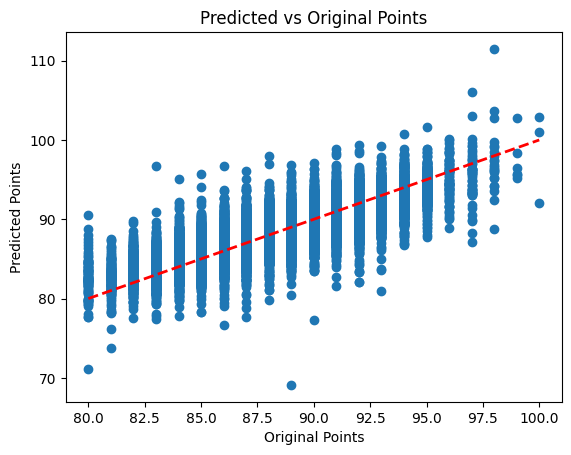

In [18]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Plotting the diagonal line
plt.xlabel('Original Points')
plt.ylabel('Predicted Points')
plt.title('Predicted vs Original Points')
plt.show()

In [19]:
import pandas as pd

comparison = pd.DataFrame({'Original Points': y_test, 'Predicted Points': y_pred})

print(comparison)

        Original Points  Predicted Points
30391                87         87.075331
8914                 92         94.952219
123704               90         88.524206
61515                86         85.998572
69102                85         83.574845
...                 ...               ...
125058               86         84.586088
54593                84         84.246840
61318                88         85.306144
120108               85         85.190099
47920                94         94.935291

[24195 rows x 2 columns]
